<a href="https://colab.research.google.com/github/chilledab/CF001/blob/main/dogs_vs_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle

In [2]:
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:52<00:00, 25.4MB/s]
100% 1.06G/1.06G [00:52<00:00, 21.8MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
#from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

# Creating generators - divide long datasets to batches - reduce computation

In [8]:
train_ds= keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds= keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


we have numpy arrays, i.e. size of 0-255 , but we need 0-1 , so normalize

In [9]:
#Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image.label

  train_ds = train_ds.map(process)
  validation_ds = validation_ds.map(process)

Dataset is ready , now build CNN

In [18]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 66s 92ms/step - loss: 3.9692 - accuracy: 0.5224 - val_loss: 0.6875 - val_accuracy: 0.5444
Epoch 2/10
625/625 [==============================] - 52s 82ms/step - loss: 0.6785 - accuracy: 0.5580 - val_loss: 0.6852 - val_accuracy: 0.5518
Epoch 3/10
625/625 [==============================] - 58s 93ms/step - loss: 0.6364 - accuracy: 0.6128 - val_loss: 0.7077 - val_accuracy: 0.5694
Epoch 4/10
625/625 [==============================] - 52s 83ms/step - loss: 0.5626 - accuracy: 0.6789 - val_loss: 0.7678 - val_accuracy: 0.5460
Epoch 5/10
625/625 [==============================] - 51s 81ms/step - loss: 0.4910 - accuracy: 0.7303 - val_loss: 0.8681 - val_accuracy: 0.5414
Epoch 6/10
625/625 [==============================] - 56s 89ms/step - loss: 0.4204 - accuracy: 0.7782 - val_loss: 1.0789 - val_accuracy: 0.5542
Epoch 7/10
625/625 [==============================] - 61s 97ms/step - loss: 0.4143 - accuracy: 0.7893 - val_loss: 1.0409 - val_accuracy:

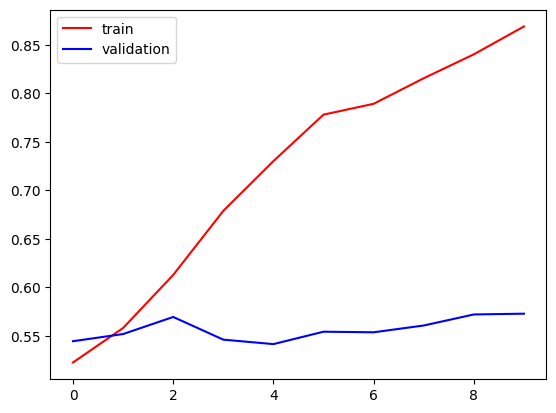

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

train curve is good the accuracy is increasing , but the validation loss curve is steady
it means the model is overfit

ways to reduce overfitting
[1.Add more Data]
[2.Data Augumentation]
[3.L1/L2 Regularizer]
[4.Batch Norm]
[5.Reduce Complexity]

In [ ]:
#Batch Norm & Dropout

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history = model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
625/625 [==============================] - 70s 105ms/step - loss: 1.2854 - accuracy: 0.5660 - val_loss: 0.7166 - val_accuracy: 0.5524
Epoch 2/5
625/625 [==============================] - 63s 101ms/step - loss: 0.6025 - accuracy: 0.6770 - val_loss: 0.5899 - val_accuracy: 0.6600
Epoch 3/5
625/625 [==============================] - 64s 102ms/step - loss: 0.4916 - accuracy: 0.7624 - val_loss: 0.4949 - val_accuracy: 0.7604
Epoch 4/5
625/625 [==============================] - 64s 102ms/step - loss: 0.4218 - accuracy: 0.8059 - val_loss: 0.5707 - val_accuracy: 0.7454
Epoch 5/5
625/625 [==============================] - 65s 104ms/step - loss: 0.3595 - accuracy: 0.8412 - val_loss: 0.4756 - val_accuracy: 0.7866


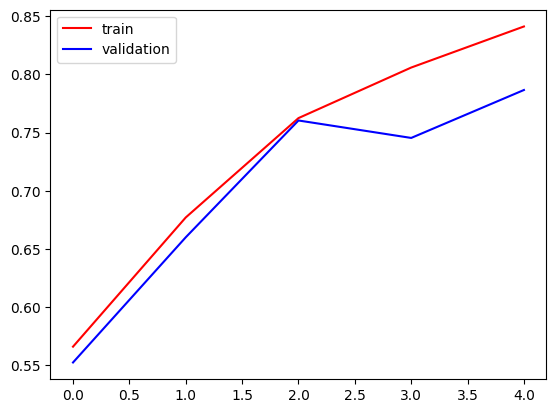

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

validation curve of accuracy is increasing means batch norm and dropout have worked and reduced overfitting

TRYING PREDICTION ON NEW UNSEEN DATA

In [22]:
import cv2

In [23]:
test_img = cv2.imread('/content/dog.jpg')

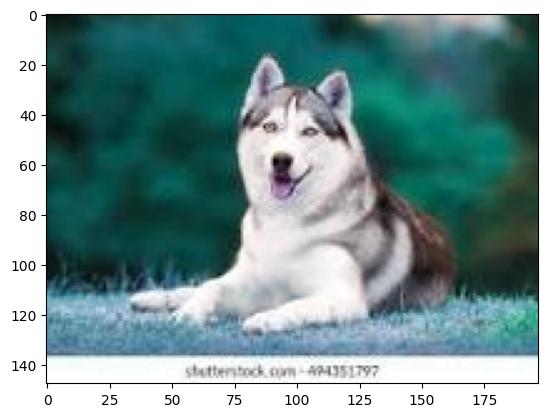

In [24]:
plt.imshow(test_img)

In [26]:
test_img.shape

(148, 197, 3)

In [27]:
test_img= cv2.resize(test_img,(256,256))

In [28]:
test_img.shape

(256, 256, 3)

In [29]:
test_input = test_img.reshape((1,256,256,3))

cats assigned 0 and dogs 1 | predicted value near to 1 hence a dog

In [30]:
model.predict(test_input)

1/1 [==============================] - 0s 425ms/step


array([[0.74166024]], dtype=float32)